# Introdução

FIFA 22 é um jogo de videogame de simulação de futebol desenvolvido pela EA Sports. Foi lançado para Microsoft Windows, PlayStation 4 e Xbox One em outubro de 2021. O jogo apresenta mais de 700 times licenciados e mais de 17.000 jogadores, permitindo que os jogadores escolham entre uma variedade de times e jogadores para criar seu próprio time dos sonhos. Ele também inclui vários modos de jogo, como o popular modo Ultimate Team, que permite aos jogadores construir e gerenciar seu próprio time coletando e trocando cartas de jogadores. Além desses recursos, o jogo também inclui várias melhorias e atualizações na jogabilidade, gráficos e outras áreas, tornando-o uma experiência agradável e envolvente para os jogadores. 
<br>
  Deste modo através de uma análise da base de dados disponível no Kaggle contendo informações sobre os jogadores,pode-se desenvolver algumas hipóteses:

- Os jogadores mais velhos, tem atributos como velocidade e condicionamento físico pior comparado aos mais novos

- Os time mais caro tem maior número de jogadores no top 400

- Os atributos de condicionamento físico e velocidade não se relacionam no jogo,fato que ocorre na vida real.

- Dentre outras que podem surgir durante a análise.


# Carregando as bibliotecas 

In [28]:
import pandas as pd
import seaborn as sns
import statistics  as sts
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Carregando e explorando  o Dataset 

In [2]:
df = pd.read_csv("players_21.csv")
df


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,张梦炫,CB,47,52,70000.0,1000.0,21,...,47+2,47+2,47+2,45+2,15+2,https://cdn.sofifa.net/players/257/710/21_120.png,https://cdn.sofifa.net/teams/112165/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18940,257933,https://sofifa.com/player/257933/wenzhuo-huang...,Huang Wenzhou,黄文卓,CM,47,53,70000.0,1000.0,21,...,46+2,46+2,46+2,47+2,15+2,https://cdn.sofifa.net/players/257/933/21_120.png,https://cdn.sofifa.net/teams/112540/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18941,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,宋岳,CM,47,47,45000.0,2000.0,28,...,46+1,46+1,46+1,47,11+2,https://cdn.sofifa.net/players/257/936/21_120.png,https://cdn.sofifa.net/teams/111774/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18942,258736,https://sofifa.com/player/258736/vani-da-silva...,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,47,67,130000.0,500.0,17,...,26+2,26+2,26+2,33+2,14+2,https://cdn.sofifa.net/players/258/736/21_120.png,https://cdn.sofifa.net/teams/1920/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png


In [3]:
#explorando as colunas
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [4]:
#Verificandos se possui valores Null
df.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url         225
club_flag_url         225
nation_logo_url     17817
nation_flag_url         0
Length: 110, dtype: int64

In [5]:
#Explorando a coluna de times
df["club_name"]

0                         FC Barcelona
1                             Juventus
2                    FC Bayern München
3                  Paris Saint-Germain
4                      Manchester City
                     ...              
18939    Chongqing Liangjiang Athletic
18940                 Shanghai Port FC
18941          Tianjin Jinmen Tiger FC
18942                  Oldham Athletic
18943                  Oldham Athletic
Name: club_name, Length: 18944, dtype: object

In [6]:
#Criando um novo dataset, somente com as informações relevantes para a análise
df2 = df.filter(['sofifa_id','short_name', 'player_positions','overall','value_eur', 'age','pace','club_name','physic'])

In [7]:
#Vamos visualizar nosso novo Dataset
df2

,sofifa_id,short_name,player_positions,overall,value_eur,age,pace,club_name,physic
0,158023,L. Messi,"RW, ST, CF",93,103500000.0,33,85.0,FC Barcelona,65.0
1,20801,Cristiano Ronaldo,"ST, LW",92,63000000.0,35,89.0,Juventus,77.0
2,188545,R. Lewandowski,ST,91,111000000.0,31,78.0,FC Bayern München,82.0
3,190871,Neymar Jr,"LW, CAM",91,132000000.0,28,91.0,Paris Saint-Germain,59.0
4,192985,K. De Bruyne,"CAM, CM",91,129000000.0,29,76.0,Manchester City,78.0
...,...,...,...,...,...,...,...,...,...
18939,257710,Zhang Mengxuan,CB,47,70000.0,21,58.0,Chongqing Liangjiang Athletic,48.0
18940,257933,Huang Wenzhou,CM,47,70000.0,21,58.0,Shanghai Port FC,48.0
18941,257936,Song Yue,CM,47,45000.0,28,65.0,Tianjin Jinmen Tiger FC,59.0
18942,258736,V. Da Silva,ST,47,130000.0,17,70.0,Oldham Athletic,40.0


In [8]:
# Aplicação de um filtro, para analisar-se somente os 400  primeiros jogadores
df2 = df2.loc[0:399]
df2

,sofifa_id,short_name,player_positions,overall,value_eur,age,pace,club_name,physic
0,158023,L. Messi,"RW, ST, CF",93,103500000.0,33,85.0,FC Barcelona,65.0
1,20801,Cristiano Ronaldo,"ST, LW",92,63000000.0,35,89.0,Juventus,77.0
2,188545,R. Lewandowski,ST,91,111000000.0,31,78.0,FC Bayern München,82.0
3,190871,Neymar Jr,"LW, CAM",91,132000000.0,28,91.0,Paris Saint-Germain,59.0
4,192985,K. De Bruyne,"CAM, CM",91,129000000.0,29,76.0,Manchester City,78.0
...,...,...,...,...,...,...,...,...,...
395,189271,F. Coquelin,"CM, CDM",80,20500000.0,29,71.0,Villarreal CF,81.0
396,189362,Hulk,"RW, ST",80,13000000.0,33,80.0,Shanghai Port FC,86.0
397,189505,Pedro,"RW, LW",80,16500000.0,32,73.0,Roma,50.0
398,189690,Guaita,GK,80,7000000.0,33,NaN,Crystal Palace,NaN


In [9]:
#substituindo os valores de pace e physic e value_eur pela mediana
mediana_pace = df2['pace'].median()
mediana_pace

mediana_physic = df2["physic"].median()
mediana_physic

mediana_valoreur = df2["value_eur"].median()
mediana_valoreur

34250000.0

In [10]:
df2['pace'].fillna( mediana_pace,inplace = True)
df2['physic'].fillna( mediana_physic,inplace = True)
df2['value_eur'].fillna( mediana_valoreur,inplace = True)


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [12]:
#Visualizando novamente o dataset
df2

,sofifa_id,short_name,player_positions,overall,value_eur,age,pace,club_name,physic
0,158023,L. Messi,"RW, ST, CF",93,103500000.0,33,85.0,FC Barcelona,65.0
1,20801,Cristiano Ronaldo,"ST, LW",92,63000000.0,35,89.0,Juventus,77.0
2,188545,R. Lewandowski,ST,91,111000000.0,31,78.0,FC Bayern München,82.0
3,190871,Neymar Jr,"LW, CAM",91,132000000.0,28,91.0,Paris Saint-Germain,59.0
4,192985,K. De Bruyne,"CAM, CM",91,129000000.0,29,76.0,Manchester City,78.0
...,...,...,...,...,...,...,...,...,...
395,189271,F. Coquelin,"CM, CDM",80,20500000.0,29,71.0,Villarreal CF,81.0
396,189362,Hulk,"RW, ST",80,13000000.0,33,80.0,Shanghai Port FC,86.0
397,189505,Pedro,"RW, LW",80,16500000.0,32,73.0,Roma,50.0
398,189690,Guaita,GK,80,7000000.0,33,76.0,Crystal Palace,75.0


In [13]:
#Verificando se as colunas que o preenchimento da mediana foi feito, realmente
#estão corretas
print(df2.isna().sum())


sofifa_id           0
short_name          0
player_positions    0
overall             0
value_eur           0
age                 0
pace                0
club_name           2
physic              0
dtype: int64


# Análises 
    Agora com um dataset mais compacto, podemos fazer algumas análises

# Análise Univariada


In [14]:
df2.club_name.value_counts()

Atlético de Madrid                   18
FC Barcelona                         16
Liverpool                            16
FC Bayern München                    15
Manchester City                      15
                                     ..
U.S. Sassuolo Calcio                  1
AS Saint-Étienne                      1
Dalian Professional Football Club     1
Club Brugge KV                        1
Fenerbahçe SK                         1
Name: club_name, Length: 97, dtype: int64

Text(0.5, 1.0, 'Número de jogadores por clube')

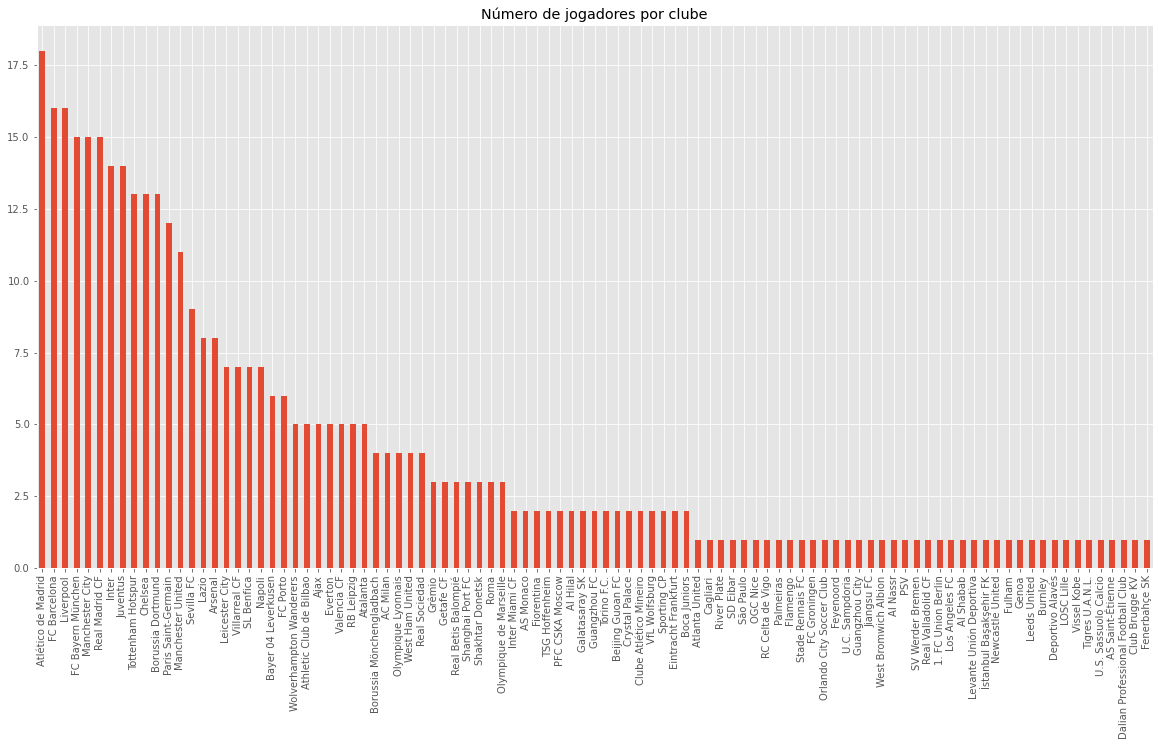

In [15]:
_=df2.club_name.value_counts().plot.bar(figsize= (20,10))
plt.title("Número de jogadores por clube")

Vemos que o Atlético de madrid é o clube com o maior número de jogadores no top 400. Em uma análise posterior verificaremos se ele também é o time mais caro. 

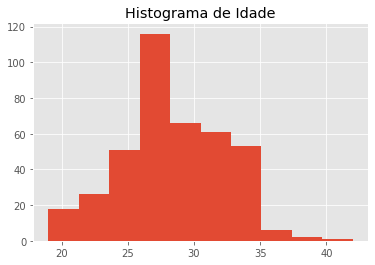

In [16]:
_= plt.hist(df2.age)
_= plt.title ("Histograma de Idade")

Nota-se que a maioria dos jogadores estão entre a faixa dos 25 a 30 anos. 

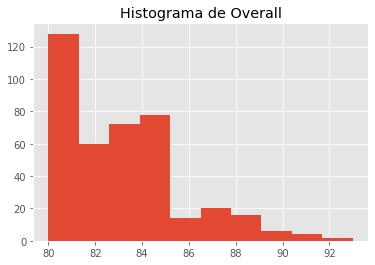

In [17]:
_= plt.hist(df2.overall)
_= plt.title ("Histograma de Overall")

Também pode-se verificar que o número de jogadores com overall elevado é menor, uma vez que existem menos jogadores com maiores habilidades.

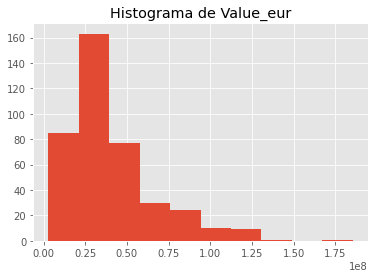

In [18]:
_= plt.hist(df2.value_eur)
_= plt.title ("Histograma de Value_eur")

Em relação aos valores dos jogadores, percebe-se que existem poucos jogadores que valem uma quantia alta de dinheiro. Em uma posterior análise bivariada, será possível verificar a relação entre o value_eur e outras variáveis.

In [19]:
df2.player_positions.value_counts()

GK             62
CB             46
ST             35
LB             17
CM             17
               ..
CAM, LW, CM     1
RW, LW, CAM     1
CM, CAM, LM     1
LM, RM, LW      1
RW, ST          1
Name: player_positions, Length: 120, dtype: int64

Text(0.5, 1.0, 'Percentual de jogadores por posição')

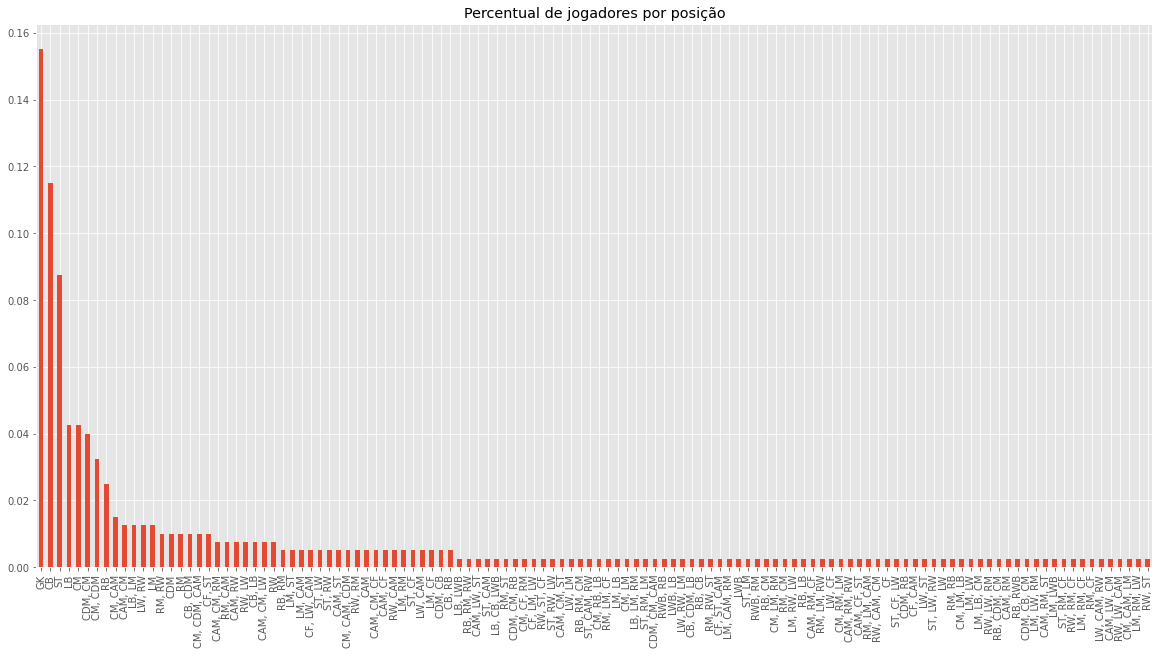

In [23]:
_=df2.player_positions.value_counts(1).plot.bar(figsize= (20,10))
plt.title("Percentual de jogadores por posição")

Pode-se verificar  que apesar de existirem diversas combinações de diferentes posições, o número de jogadores que joga em mais de uma posição é raro, em especial jogadores que atuam em mais de 3 posições.

# Análise Bivariada 

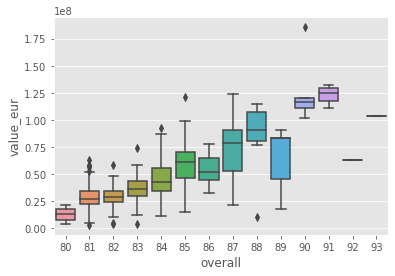

In [29]:
_= sns.boxplot( x = 'overall' , y = "value_eur" , data = df2 ) 

Através do boxplot e do gráfico de dispersão (abaixo) pôde-se avaliar a faixa de valores dos jogadores de um determinado overall. 
Nota-se que realmente conforme o overall sobe, a faixa de valores tende a subir, com excessão dos jogadores de overall 89. Podemos verificar tal fato também, em um gráfico de dispersão abaixo.
  Assim pode-se dizer que é melhor investir em um jogador com overall 89 do que 88 por exemplo, pois eles são mais baratos
e entregam atributos gerais melhores.

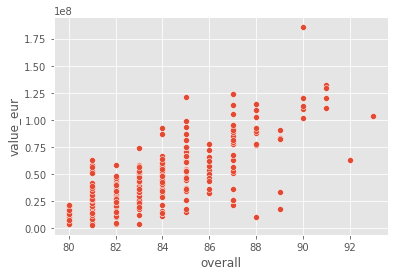

In [30]:
_=sns.scatterplot(  x = 'overall' , y = "value_eur" , data = df2)

-----------------------------------------------------------

Pode-se também procurar relações entre os valores dos jogadores (value_eur) e a idade (age) do jogadores, utilizando o gráfico de disperção

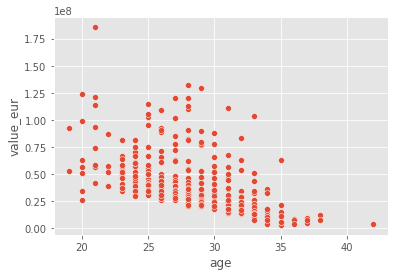

In [31]:
_=sns.scatterplot(  x = 'age' , y = "value_eur" , data = df2)

Através do gráfico de disperção pode-se notar uma relação entre o valor do jogador e a idade do mesmo. Conforme a idade dele aumenta, o seu valor tende a diminuir.

# Análise Multivariada 

In [27]:
df2.corr()

,sofifa_id,overall,value_eur,age,pace,physic
sofifa_id,1.000000,-0.032101,0.346121,-0.784820,0.299335,0.100168
overall,-0.032101,1.000000,0.768911,-0.017517,0.135341,0.056159
value_eur,0.346121,0.768911,1.000000,-0.518786,0.308922,0.013878
age,-0.784820,-0.017517,-0.518786,1.000000,-0.377796,-0.013922
pace,0.299335,0.135341,0.308922,-0.377796,1.000000,-0.251420
physic,0.100168,0.056159,0.013878,-0.013922,-0.251420,1.000000


Através da tabela acima, pode-se concluir alguns pontos:

1.   O valor_eur é diretamente influenciado pelo overall;
2.   O pace (um atributo relacionado a velocidade do jogador) está  muito relacionado com o physic ( condição física) do jogador.
3. Apesar de não estar tão próximo de -1 , verifica-se que a idade tem uma relativa relação com o preço do jogador.



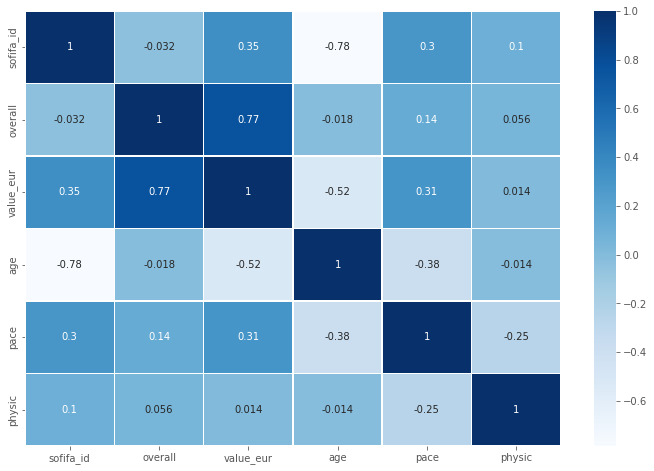

In [32]:
# Vamos verificar melhor essas correlações através de um heatmap
fig, ax = plt.subplots(figsize=(12, 8))

_ = sns.heatmap(df2.corr(), cmap = 'Blues', linewidth = 0.5, annot = True)

In [34]:
# Resumo dos principais times 
resumo = (
    df2.groupby(["club_name"], sort=False)
    .agg(
        Valor_time =("value_eur", "sum"),
        media_overall =("overall", "mean"),
        media_pace = ("pace", "mean"),
        media_physic = ("physic","mean"),
      )
    .reset_index()
)

tabela_times = resumo.sort_values(by="Valor_time", ascending= False, ignore_index=True )
tabela_times

,club_name,Valor_time,media_overall,media_pace,media_physic
0,Liverpool,1.147500e+09,85.750000,74.937500,75.687500
1,Manchester City,1.003000e+09,85.333333,78.000000,72.866667
2,Real Madrid CF,9.295000e+08,85.933333,76.333333,74.066667
3,FC Barcelona,9.145000e+08,85.500000,74.562500,72.937500
4,FC Bayern München,8.295000e+08,84.466667,75.600000,75.666667
...,...,...,...,...,...
92,Vissel Kobe,8.000000e+06,81.000000,58.000000,59.000000
93,FC Groningen,7.000000e+06,80.000000,74.000000,57.000000
94,U.C. Sampdoria,7.000000e+06,80.000000,64.000000,63.000000
95,Jiangsu FC,5.500000e+06,80.000000,65.000000,77.000000


# Conclusões
Respondendo as hipóteses:


1.   Os jogadores mais velhos não têm seus atributos de physic e pace afetados diretamente pelo atributo Age.
2.   O time mais caro (Liverpool) não possue o maior número de jogadores no top 400 (Atlético de Madrid). O Atlético de madrid ocupa a quinta colocação.
3. O atributo pace e physic estão diretamente relacionados, como seria na vida real .


